In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [47]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [48]:
df.shape

(5000, 14)

In [49]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [50]:
set(df.zip_code.astype('str').str.len().values)

{4, 5}

In [51]:
df[df.zip_code.astype('str').str.len() != 5]

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [52]:
## moving personal load to the end of dataframe as its target variable
cols = list(df.columns.values) 
cols.pop(cols.index('personal_loan')) 
df = df[cols+['personal_loan']]
df.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard,personal_loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
id                    5000 non-null int64
age                   5000 non-null int64
experience            5000 non-null int64
income                5000 non-null int64
zip_code              5000 non-null int64
family                5000 non-null int64
ccavg                 5000 non-null float64
education             5000 non-null int64
mortgage              5000 non-null int64
securities_account    5000 non-null int64
cd_account            5000 non-null int64
online                5000 non-null int64
creditcard            5000 non-null int64
personal_loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [54]:
## There is no null value in dataset
df.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
securities_account    0
cd_account            0
online                0
creditcard            0
personal_loan         0
dtype: int64

In [55]:
# number of unique in each column
df.nunique()

id                    5000
age                     45
experience              47
income                 162
zip_code               467
family                   4
ccavg                  108
education                3
mortgage               347
securities_account       2
cd_account               2
online                   2
creditcard               2
personal_loan            2
dtype: int64

In [56]:
## Number of People with 0 mortgage
## There are 3462 people with 0 mortgae out of 5000(making it highly skewed dataset)
(df.mortgage == 0).sum()

3462

In [57]:
## Number of people with 0 credit card spending per month
## There are 106 peple with 0 average credit card spending per month
(df.ccavg == 0).sum()


106

In [33]:
## Value count for all categorical columns
df.family.value_counts()


1    1472
2    1296
4    1222
3    1010
Name: family, dtype: int64

In [34]:
df.education.value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [35]:
df.securities_account.value_counts()

0    4478
1     522
Name: securities_account, dtype: int64

In [36]:
df.cd_account.value_counts()

0    4698
1     302
Name: cd_account, dtype: int64

In [37]:
df.creditcard.value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

In [38]:
df.online.value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [39]:
## Experience shows negative 
df.describe()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard,personal_loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [40]:
## Experience Column has some negative values
df.iloc[:,1:3].corr()

,age,experience
age,1.000000,0.994215
experience,0.994215,1.000000


In [41]:
# experience column has high correlation with 'age' colmn so dropping this one
df.drop('experience',axis=1,inplace=True)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
zip_code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
securities_account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.00,0.0,0.00,1.0


In [44]:
## dropping 'id' and 'zip_code'
df.drop(['id','zip_code'],axis=1,inplace=True)
df.head()

KeyError: "['id' 'zip_code'] not found in axis"

In [43]:
cd_account.value_count()

NameError: name 'cd_account' is not defined

In [23]:
## changing personal loan to categorical variable
df['personal_loan'] = df.personal_loan.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
age                   5000 non-null int64
income                5000 non-null int64
family                5000 non-null int64
ccavg                 5000 non-null float64
education             5000 non-null int64
mortgage              5000 non-null int64
securities_account    5000 non-null int64
cd_account            5000 non-null int64
online                5000 non-null int64
creditcard            5000 non-null int64
personal_loan         5000 non-null category
dtypes: category(1), float64(1), int64(9)
memory usage: 395.7 KB


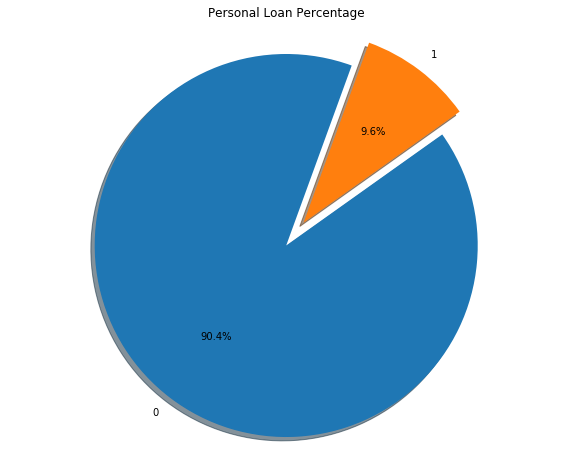

In [25]:
## Univariate Ananlysis
## 9.6 % of all the applicats get approved for personal loan
tempDF =pd.DataFrame(df.personal_loan.value_counts()).reset_index()
tempDF.columns =["Labels","Personal Loan"]
fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0, 0.15)
ax1.pie(tempDF["Personal Loan"], explode=explode, labels=tempDF["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Personal Loan Percentage")
plt.show()

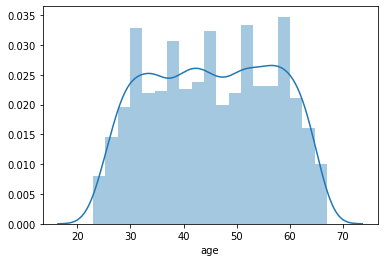

In [26]:
## Univariate Analysis
## Age seems to have symmetric Distribution
sns.distplot(df.age);

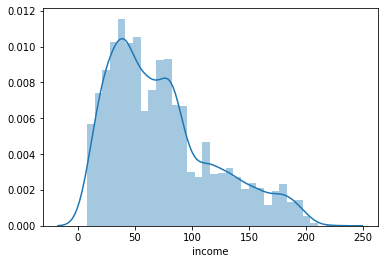

In [27]:
## Income is right skewed distribution
sns.distplot(df.income);

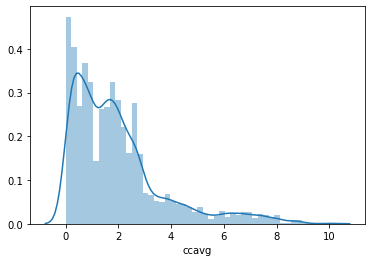

In [28]:
# Credit Card Average is right skewed distribution
sns.distplot(df.ccavg);

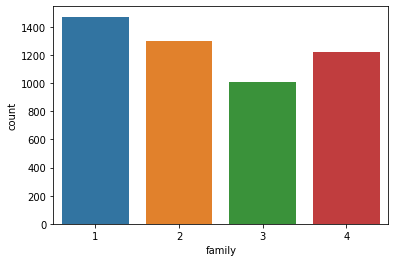

In [29]:
sns.countplot(df.family);

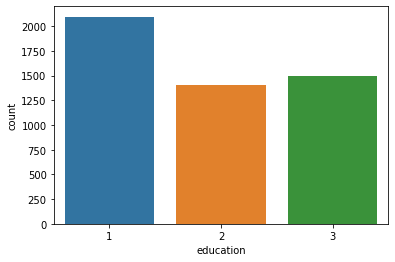

In [30]:
sns.countplot(df.education);

In [31]:
## Mulitvariate Analysis

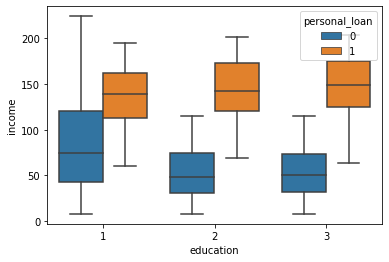

In [32]:
## It seems the customers whose has more income is gratned loan across each education level
sns.boxplot(x='education',y='income',hue='personal_loan',data=df);

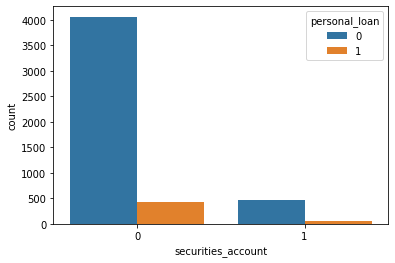

In [33]:
## Majority of people having Securities Accouont don't have personal loan
sns.countplot(x="securities_account", data=df,hue="personal_loan");

In [34]:
df.securities_account.value_counts()

0    4478
1     522
Name: securities_account, dtype: int64

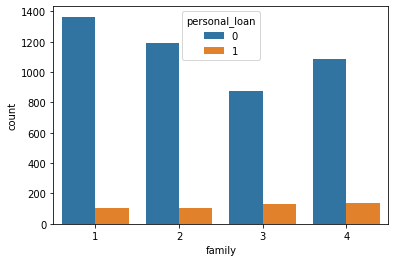

In [35]:
## family size doesn't seem to have impact on personal_loan
sns.countplot(x='family',data=df,hue='personal_loan');

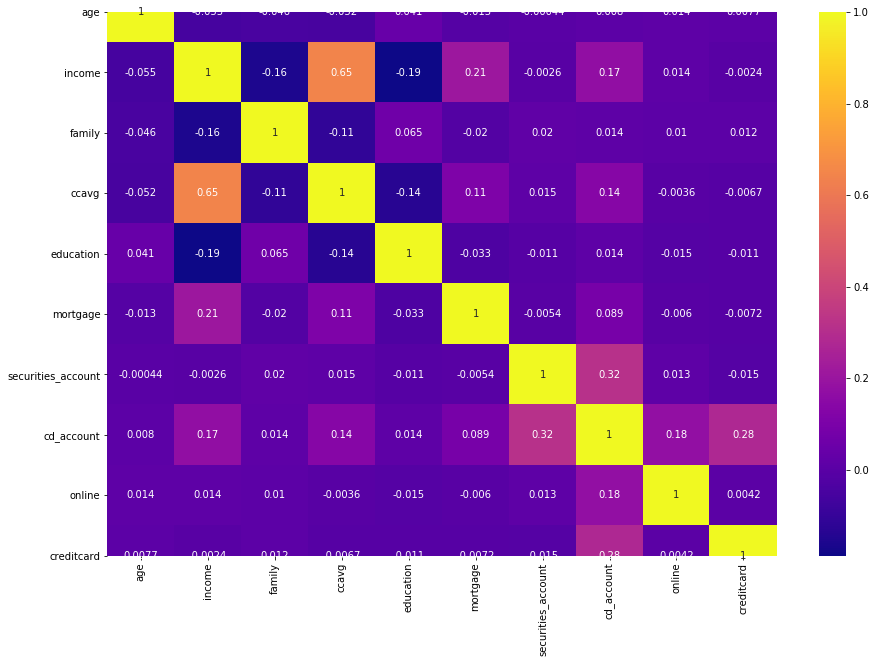

In [36]:
## after dropping Experince column earlier does't seem to be significant correlation b/w other variables except
## credti card average and income
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='plasma', annot=True);

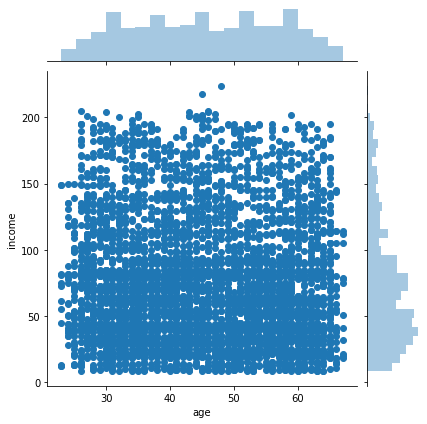

In [37]:
sns.jointplot(df.age,df.income);

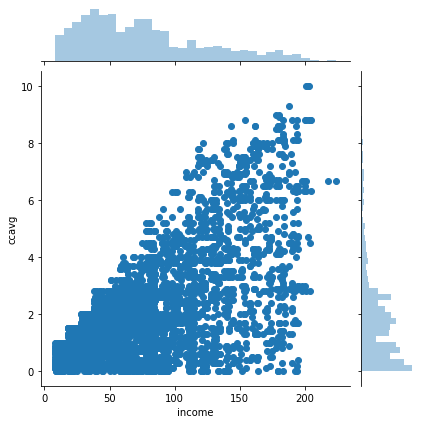

In [38]:
sns.jointplot(df.income,df.ccavg);

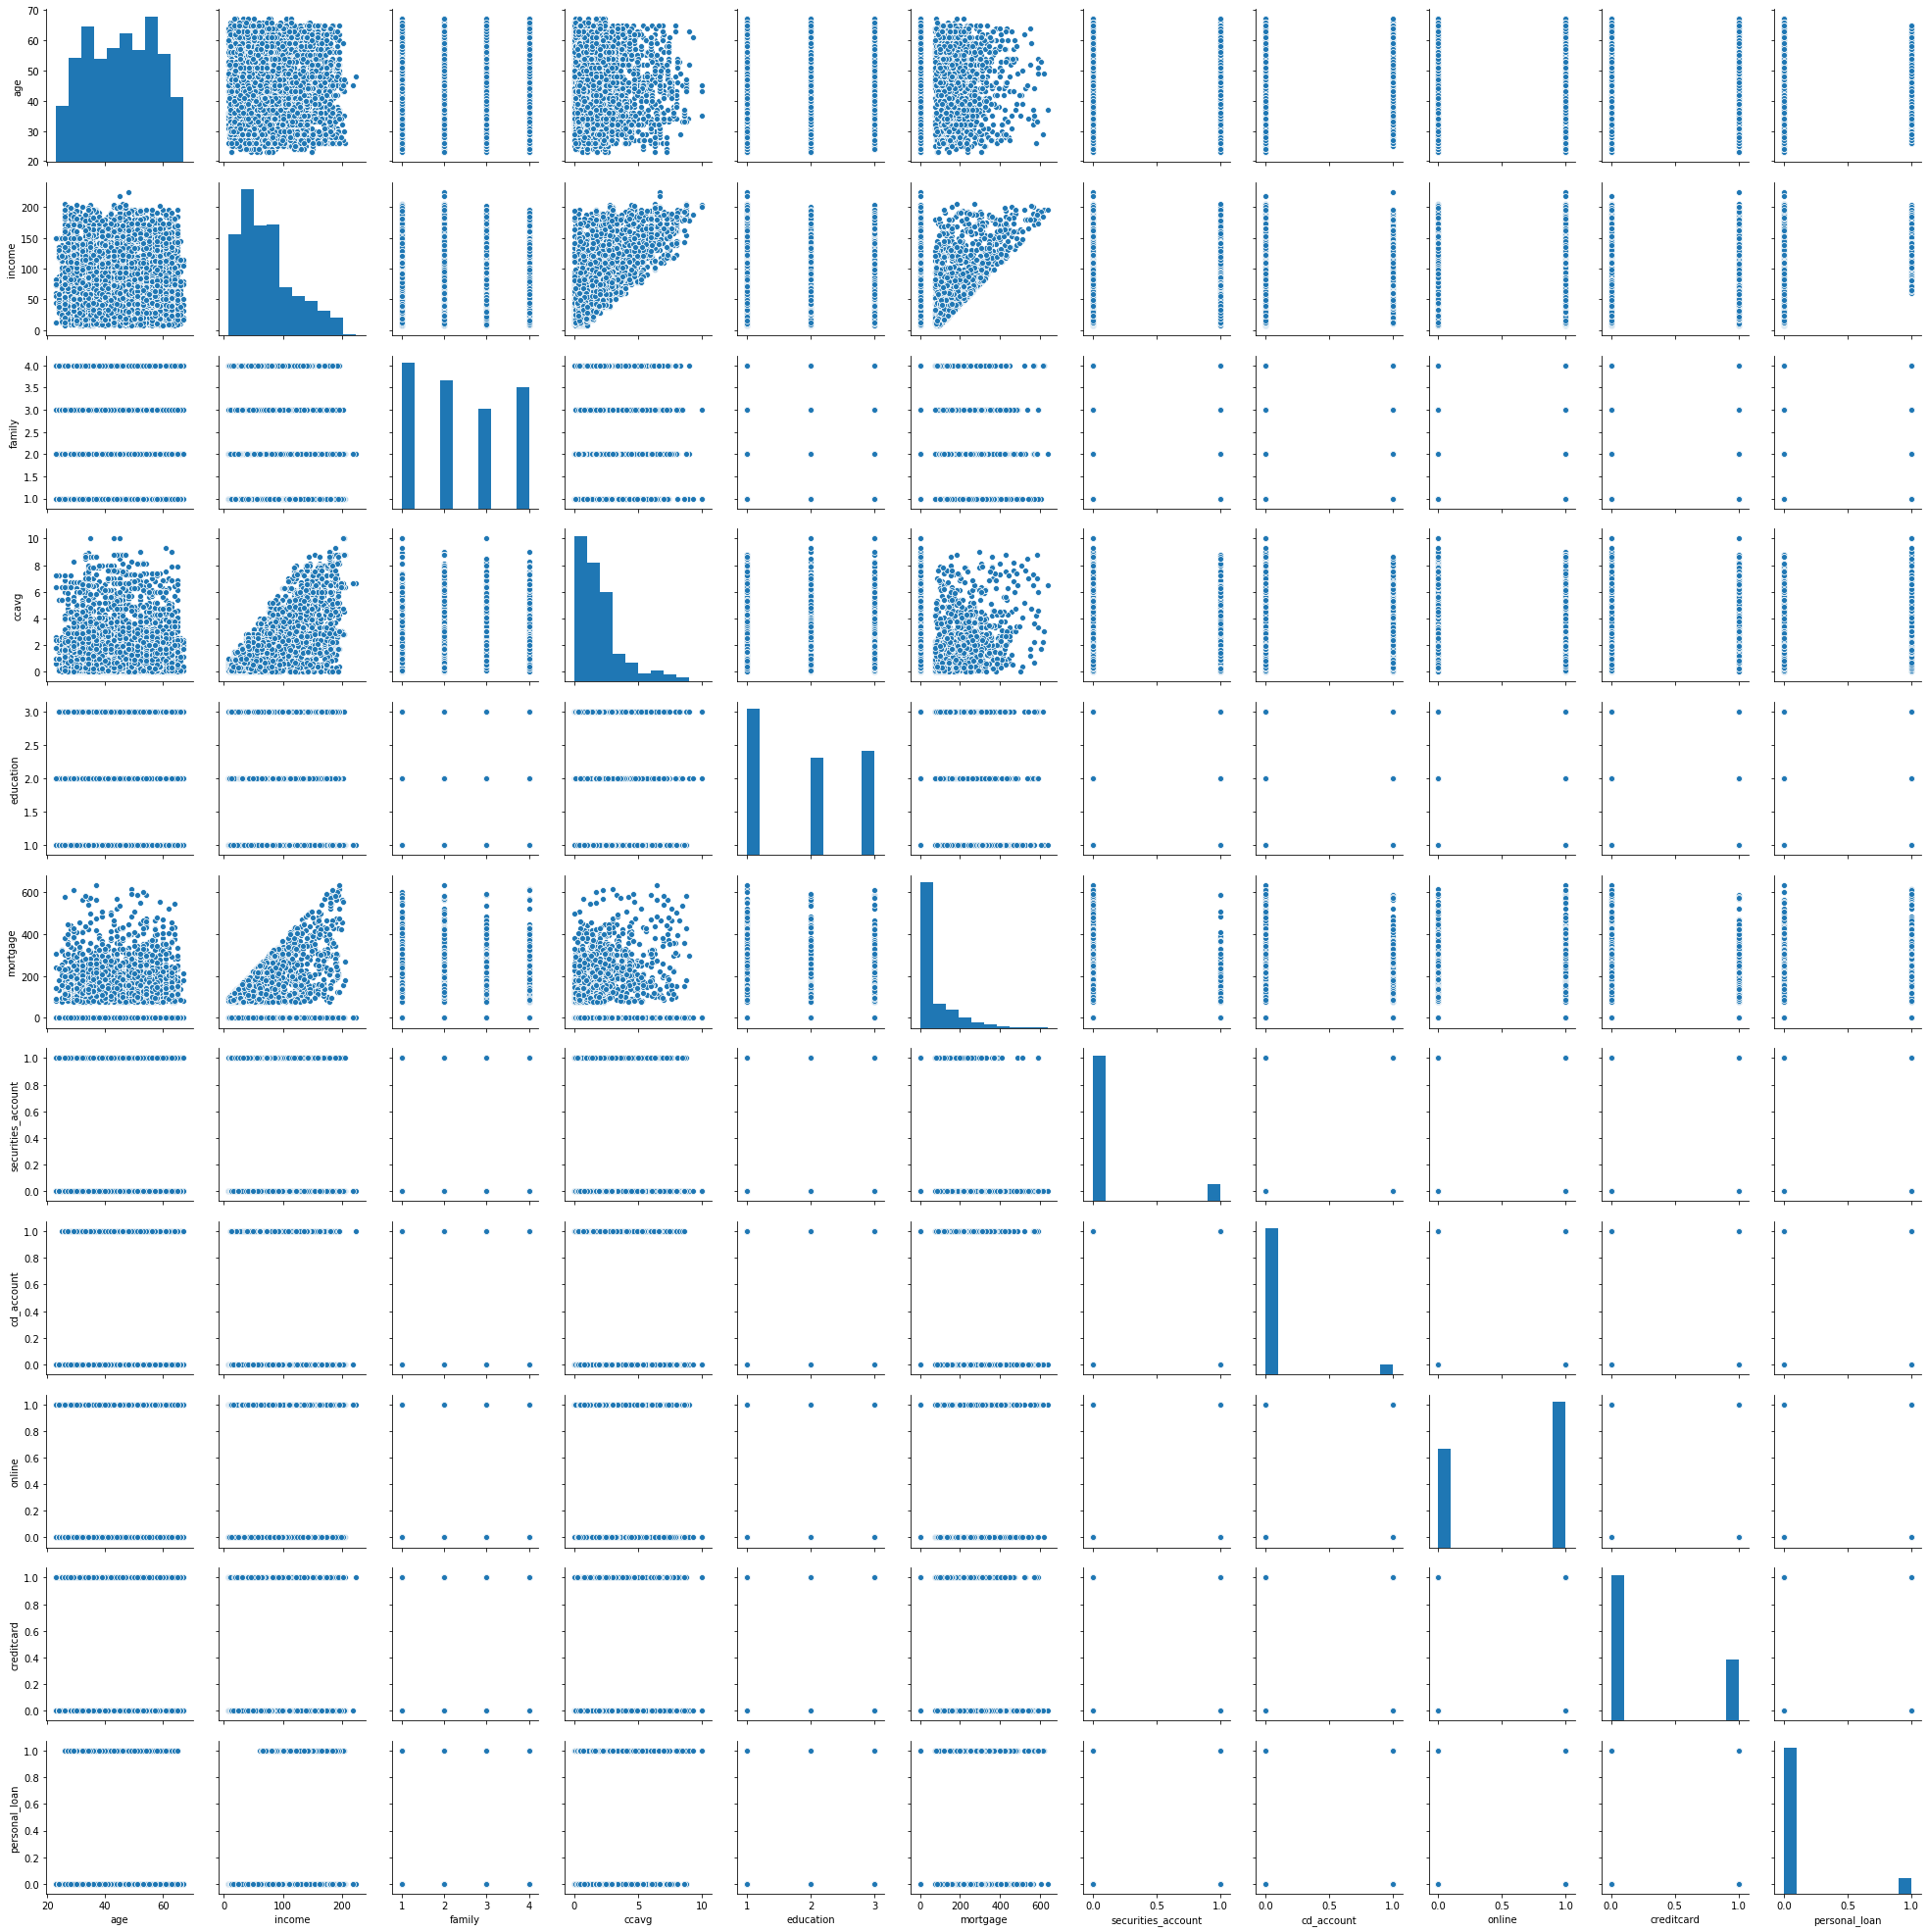

In [39]:
sns.pairplot(df)

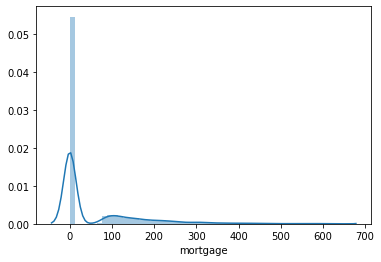

In [40]:
## Mortgage column seems highly skewed, verifying via
sns.distplot(df.mortgage);

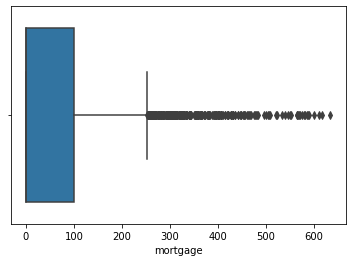

In [41]:
sns.boxplot(df.mortgage);

In [42]:
## There are 105 mortgage values with more than 3 zScore so removing those rows
from scipy import stats
(stats.zscore(df.mortgage)>=3).sum()

105

In [43]:
df = df[stats.zscore(df.mortgage) < 3 ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 11 columns):
age                   4895 non-null int64
income                4895 non-null int64
family                4895 non-null int64
ccavg                 4895 non-null float64
education             4895 non-null int64
mortgage              4895 non-null int64
securities_account    4895 non-null int64
cd_account            4895 non-null int64
online                4895 non-null int64
creditcard            4895 non-null int64
personal_loan         4895 non-null category
dtypes: category(1), float64(1), int64(9)
memory usage: 425.5 KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 11 columns):
age                   4895 non-null int64
income                4895 non-null int64
family                4895 non-null int64
ccavg                 4895 non-null float64
education             4895 non-null int64
mortgage              4895 non-null int64
securities_account    4895 non-null int64
cd_account            4895 non-null int64
online                4895 non-null int64
creditcard            4895 non-null int64
personal_loan         4895 non-null category
dtypes: category(1), float64(1), int64(9)
memory usage: 425.5 KB


In [45]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
X_train.head()

,age,income,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
3074,39,31,1,1.4,3,88,0,0,1,1
299,41,159,1,5.5,3,0,0,1,1,0
744,45,154,2,2.8,1,0,1,0,1,0
3678,49,30,4,0.6,1,0,0,0,0,0
4138,47,114,1,0.6,1,0,1,1,1,1


In [49]:
print("X_train shape = {}, X_test shape = {}".format(X_train.shape,X_test.shape))
print("y_train shape = {}, y_test shape = {}".format(y_train.shape,y_test.shape))

X_train shape = (3426, 10), X_test shape = (1469, 10)
y_train shape = (3426,), y_test shape = (1469,)


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

X_train[['age','income','ccavg','mortgage']] = scaler.fit_transform(X_train[['age','income','ccavg','mortgage']])

X_train.head()

/Users/mayanknaithani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mayanknaithani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,income,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
3074,0.363636,0.116751,1,0.14,3,0.243767,0,0,1,1
299,0.409091,0.766497,1,0.55,3,0.000000,0,1,1,0
744,0.500000,0.741117,2,0.28,1,0.000000,1,0,1,0
3678,0.590909,0.111675,4,0.06,1,0.000000,0,0,0,0
4138,0.545455,0.538071,1,0.06,1,0.000000,1,1,1,1


In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 3074 to 4019
Data columns (total 10 columns):
age                   3426 non-null float64
income                3426 non-null float64
family                3426 non-null int64
ccavg                 3426 non-null float64
education             3426 non-null int64
mortgage              3426 non-null float64
securities_account    3426 non-null int64
cd_account            3426 non-null int64
online                3426 non-null int64
creditcard            3426 non-null int64
dtypes: float64(4), int64(6)
memory usage: 294.4 KB


In [53]:
import statsmodels.api as sm

In [54]:
# Logistic regression model
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.124881
         Iterations 9


In [55]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          personal_loan   No. Observations:                 3426
Model:                          Logit   Df Residuals:                     3415
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                  0.5897
Time:                        14:09:00   Log-Likelihood:                -427.84
converged:                       True   LL-Null:                       -1042.6
Covariance Type:            nonrobust   LLR p-value:                5.963e-258
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.3586      0.731    -18.273      0.000     -14.792     -11.926
age                    0.4385      0.351      1.248      0.212      -0.250       1.127
income              

### Interpretation of Pseudo R^2

A pseudo R^2 of 58.97 indicates that 58.97 % of the uncertainty of the intercept only model is explained by the full model

In [56]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [57]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
income,10.96,57451.22,1.00,0.00
cd_account,3.69,40.04,0.98,0.00
education,1.78,5.95,0.86,0.00
ccavg,1.56,4.77,0.83,0.00
family,0.65,1.92,0.66,0.00
online,-0.68,0.51,0.34,0.00
creditcard,-1.05,0.35,0.26,0.00
securities_account,-1.07,0.34,0.26,0.00
const,-13.36,0.00,0.00,0.00


### Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [58]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
## scaling testing data with parameters from training data
X_test[['age','income','ccavg','mortgage']] = scaler.transform(X_test[['age','income','ccavg','mortgage']])

/Users/mayanknaithani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mayanknaithani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
y_predict = logreg.predict(X_test)

In [61]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9495037945125511

Testing accuracy 0.955071477195371

Confusion Matrix


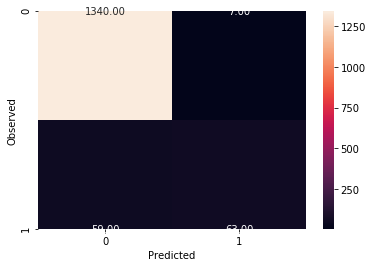

None

Recall: 0.5163934426229508

Precision: 0.9

F1 Score: 0.65625

Roc Auc Score: 0.7555983545705697


In [62]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

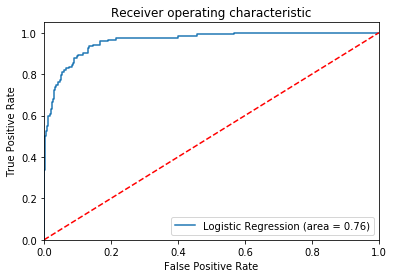

In [63]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [65]:
## Fine Tuning model using GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.001,0.001,0.1,0.25,0.5,0.75,1],
              'class_weight': ['balanced'], 'penalty': ['l2']}]

In [68]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose = 0)

In [69]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.001, 0.1, 0.25, 0.5, 0.75, 1],
                          'class_weight': ['balanced'], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [70]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
newmodel = LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
newmodel.fit(X_train,y_train)
new_predictions = newmodel.predict(X_test)

In [73]:
print('New roc auc score', roc_auc_score(y_test,new_predictions))

New roc auc score 0.8932539827424636


In [74]:
print("Recall:",recall_score(y_test,new_predictions))
print()
print("Precision:",precision_score(y_test,new_predictions))
print()
print("F1 Score:",f1_score(y_test,new_predictions))

Recall: 0.8852459016393442

Precision: 0.44813278008298757

F1 Score: 0.5950413223140496


## Findings
DataSet('Bank_Personal_Loan_Modelling') has 13 independent variables and 1 target variable("Personal Loan")
Dataset has 5000 rows and 14 columns
There are no null values
There 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
There are 2 ordinal variables : 'Education' and 'Family'
5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
Experinece is highly correlated with Age, experience has some negative values as well, as its highly correalted with Age this column is removed
**********************************************************************************
Number of people with 0 mortgae : 3642 ( which makes it highly skewed dataset)
Number of people with 0 credit card averge spending : 106
*************************************************************************************
Value Count for Family :
1    1472
2    1296
4    1222
3    1010
Value Count for Education:
1    2096
3    1501
2    1403
Value count for Security Account :
0 4478
1 522
Value Count for CD account :
0 4698
1 302
Value Count for credit card account :
0    3530
1    1470
Value count for online application :
1    2984
0    2016
**************************************************************************************
'Id','zip_code'(nominal variables) and 'experience'(hightly correlated with age) columns are dropped 
***************************************************************************************

In the given dataset 9.6% of total applicants got approved for loan

******************************************************************************

Mortgae column is highly skewed so removed rows with z_values>3 ( 105 rows) to remove skewness 
********************************************************************************************************
Interpretation of Pseudo R^2
A pseudo R^2 of 58.97 indicates that 58.97 % of the uncertainty of the intercept only model is explained by the full model

*********** Model Fit *************************************************
Trainig accuracy 0.95
Testing accuracy 0.96

Recall: 0.5163934426229508 Precision: 0.9
F1 Score: 0.65625
Roc Auc Score: 0.76


********************* Fine Tuning parameters  using GridSearch *******************************

New ROC AUC SCORE : 0.89

GridSearch give below as best parameters for Logistic Regression Model :

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)




********************* Business Understanding of Model  *******************************

Thera Bank wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. 
This will increase the success ratio while at the same time reduce the cost of the campaign depending on the "odd_ration" we can see that bank is better off targeting the customer with high odds, top five features are as below :
income
cd_account
education
ccavg






